# Introduction to Regression with Neural Networks in Tensorflow

There  are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a  number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

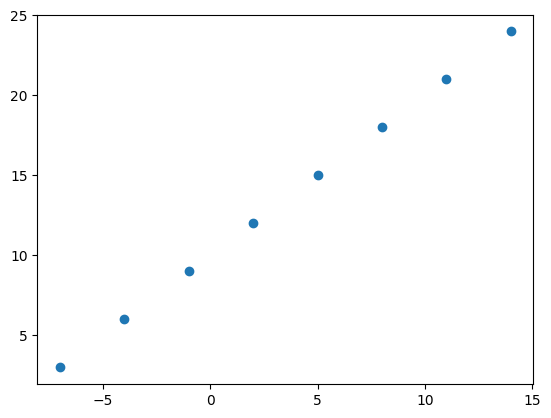

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a  demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [9]:
# turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

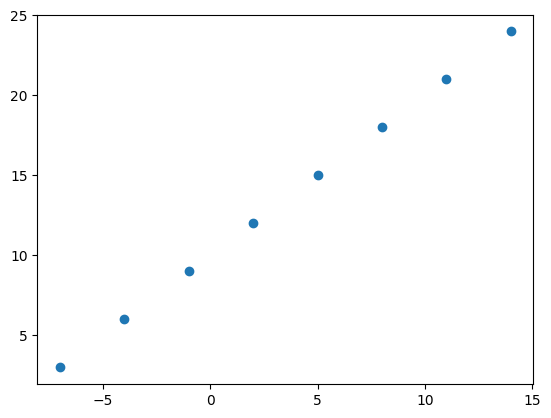

In [11]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learnign model.
2. **Compiling a  model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8.7479 - mae: 8.7479
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 8.6154 - mae: 8.6154
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 8.4829 - mae: 8.4829
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 8.3504 - mae: 8.3504
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - loss: 8.2179 - mae: 8.2179
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 8.0854 - mae: 8.0854
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 7.9529 - mae: 7.9529
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 7.8204 - mae: 7.8204
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 7.6879 - mae: 7.6879
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - loss: 7.5554 - mae: 7.5554


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[29.131754]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation fucntion of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** o fthe optimization funciton.
3. **Fiting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

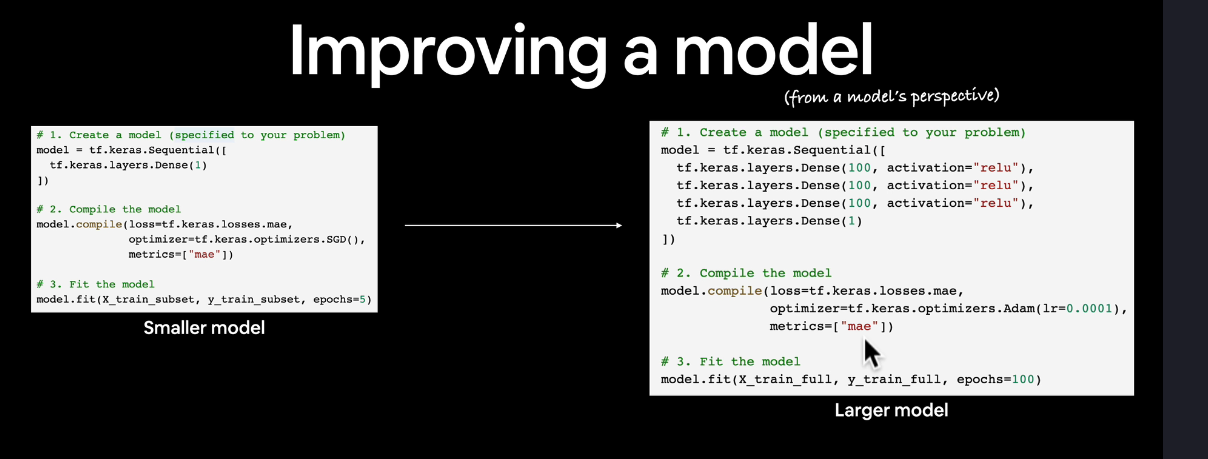

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step - loss: 16.5307 - mae: 16.5307
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 16.2495 - mae: 16.2495
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 15.9682 - mae: 15.9682
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 15.6870 - mae: 15.6870
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 15.4057 - mae: 15.4057
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 15.1245 - mae: 15.1245
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 14.8730 - mae: 14.8730
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 14.7405 - mae: 14.7405
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 14.6080 - mae: 14.6080
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 14.4755 - mae: 14.4755
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 14.3430 - mae: 14.3430
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.2105 - mae: 14.2105
Epoch 13/100
1/1 ━━

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[29.712646]], dtype=float32)

In [18]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step - loss: 12.9458 - mae: 12.9458
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 12.3586 - mae: 12.3586
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 11.7591 - mae: 11.7591
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.1515 - mae: 11.1515
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 10.5270 - mae: 10.5270
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 9.8755 - mae: 9.8755
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.1905 - mae: 9.1905
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 8.4675 - mae: 8.4675
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 7.7038 - mae: 7.7038
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 6.8880 - mae: 6.8880
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 6.0102 - mae: 6.0102
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 5.0730 - mae: 5.0730
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [19]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#Let's try to make a prediction
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[32.73244]], dtype=float32)

**Common ways to improve a deep model:**

* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimizaiton function
* Change the learning rate (potentially the most important hyperparameter)
* Fitting on more data
* Fitting for longer (epochs)




In [21]:
# Change neuron numbers

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - loss: 15.0505 - mae: 15.0505
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 14.5339 - mae: 14.5339
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.0322 - mae: 14.0322
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.5406 - mae: 13.5406
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 13.0484 - mae: 13.0484
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.5554 - mae: 12.5554
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.0579 - mae: 12.0579
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.5854 - mae: 11.5854
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.0954 - mae: 11.0954
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.5874 - mae: 10.5874
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.0578 - mae: 10.0578
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.5003 - mae: 9.5003
Epoch 13/100
1/1 ━━━━━━━━

In [22]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[31.881767]], dtype=float32)

In [23]:
# Change the activiation function

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step - loss: 13.0228 - mae: 13.0228
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.3545 - mae: 12.3545
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.6820 - mae: 11.6820
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.0017 - mae: 11.0017
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.3101 - mae: 10.3101
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.6036 - mae: 9.6036
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.8786 - mae: 8.8786
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.1313 - mae: 8.1313
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.3578 - mae: 7.3578
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.2549 - mae: 7.2549
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.2230 - mae: 7.2230
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 7.1999 - mae: 7.1999
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[27.113174]], dtype=float32)

In [25]:
# Change the optimization function

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.2224 - mae: 13.2224
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.1466 - mae: 13.1466
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.0707 - mae: 13.0707
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.9948 - mae: 12.9948
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.9189 - mae: 12.9189
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 12.8429 - mae: 12.8429
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 12.7668 - mae: 12.7668
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 12.6907 - mae: 12.6907
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 12.6145 - mae: 12.6145
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 12.5382 - mae: 12.5382
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 12.4619 - mae: 12.4619
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 12.3855 - mae: 12.3855
Epoch 13/100
1/1 ━━━━━━━━

In [26]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[31.505058]], dtype=float32)

In [27]:
# Change the learning rate

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.9541 - mae: 13.9541
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.1946 - mae: 13.1946
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.4336 - mae: 12.4336
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.6673 - mae: 11.6673
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.8930 - mae: 10.8930
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.1080 - mae: 10.1080
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.3099 - mae: 9.3099
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.4963 - mae: 8.4963
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.6648 - mae: 7.6648
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.8133 - mae: 6.8133
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.7239 - mae: 6.7239
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.0967 - mae: 7.0967
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [28]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[26.26277]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaulate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...

```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does a model perform while it learns?
* The predictions of the model - How do the predictions of a model line up  against the ground truth (the original labels)?

In [29]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [30]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

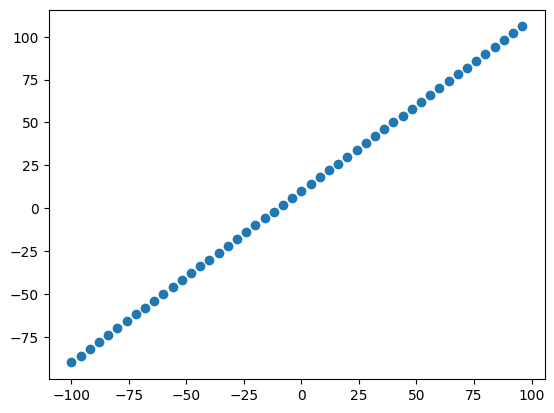

In [31]:
# Visualize the data
import matplotlib.pyplot as plt
# plt.plot(X, y)
plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typicaly 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available.

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

In [32]:
# Check the length of how many samples we have
len(X)

50

In [33]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are taining samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

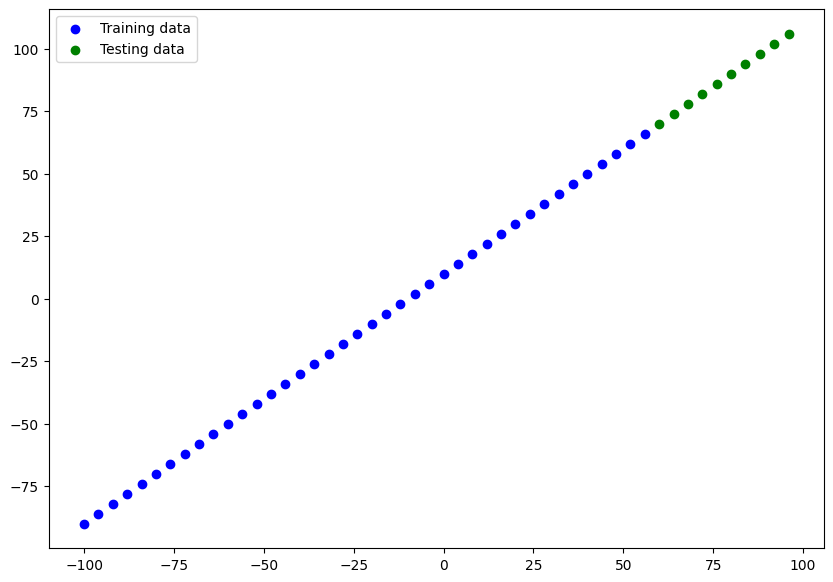

In [34]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in greem
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [35]:
# Let's have a look a at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [36]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Let's create a model which build automatically by definin gthe input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [114]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [174]:
# Let's fit our model to the training data


model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.8380 - mae: 10.8380
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7850 - mae: 7.7850
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.2537 - mae: 9.2537
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.0020 - mae: 11.0020
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.9365 - mae: 11.9365
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.1896 - mae: 7.1896
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.8979 - mae: 7.8979
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.8982 - mae: 6.8982
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.6075 - mae: 8.6075
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.8803 - mae: 6.8803
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.6770 - mae: 8.6770
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.7023 - mae: 6.7023
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33

In [116]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

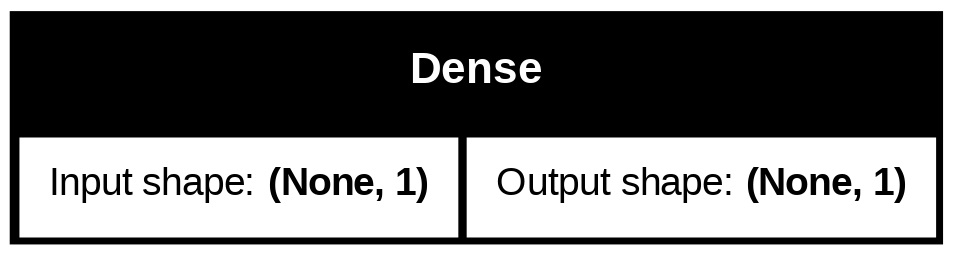

In [117]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth lables.

Often you'll see this in the form of 'y_test' or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [123]:
# Make some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[ 69.183945],
       [ 73.703705],
       [ 78.223465],
       [ 82.74323 ],
       [ 87.26299 ],
       [ 91.78276 ],
       [ 96.30252 ],
       [100.82228 ],
       [105.34205 ],
       [109.86181 ]], dtype=float32)

In [75]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note** If you feel like you're goind to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [124]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data, and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predicitons in red
  plt.scatter(test_data, predictions, c="r", label="Predicitons")
  # Show the legend
  plt.legend();

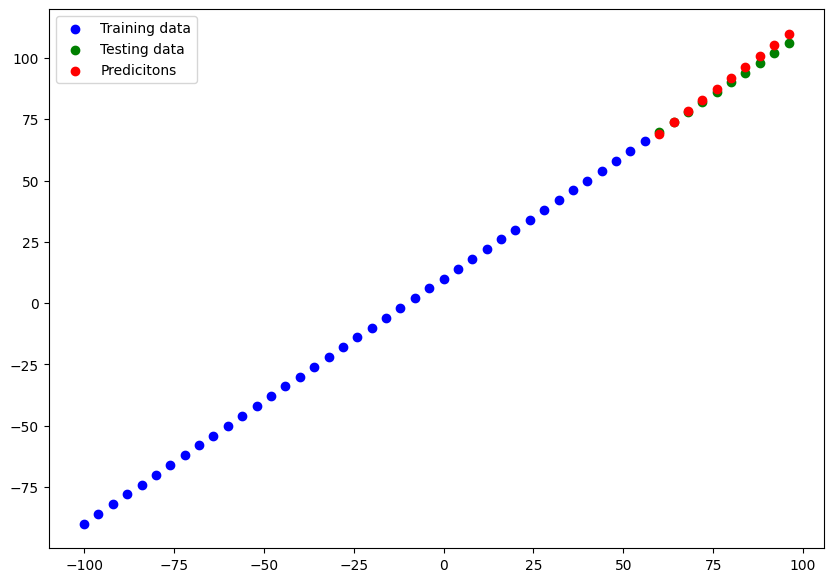

In [125]:
# plot_predictions()
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predicitons with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on avarage, how wrong is each of my model's predicitons"
* MSE - mean square error, "square the average error"

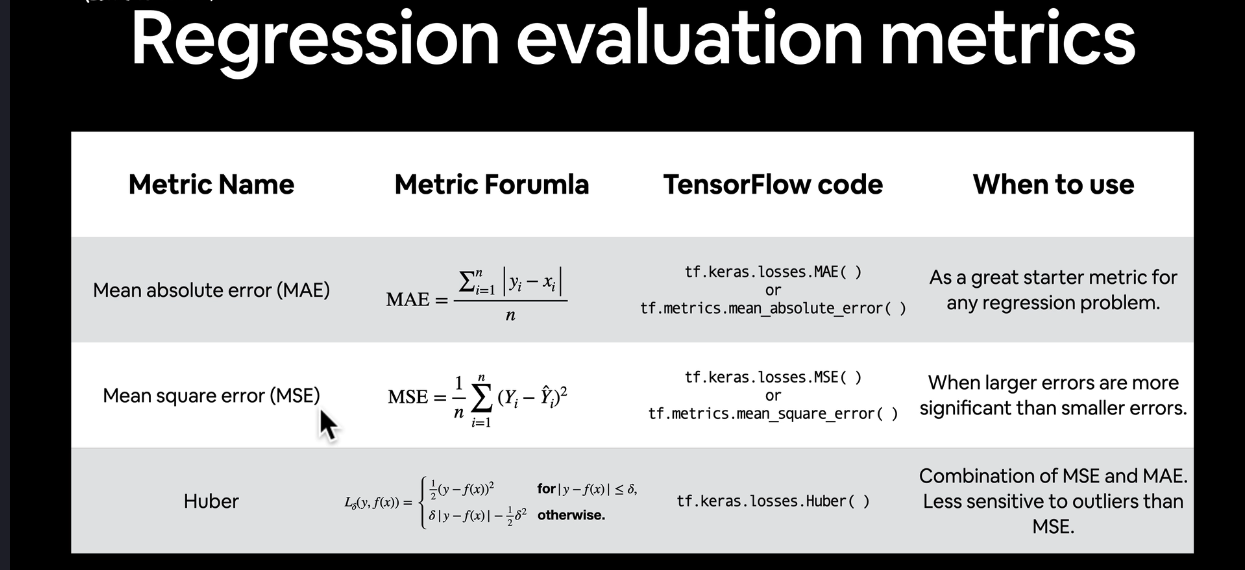

In [126]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 1.7453 - mae: 1.7453


[1.7453460693359375, 1.7453460693359375]

In [161]:
# Calculate the mean absolute error
# mae = sum(abs(y_pred.reshape(-1) - y_test)) / len(y_test);
# mae
#mae = sum(abs(y_pred.squeeze() - y_test)) / len(y_test);
#mae
tf.keras.metrics.mae(y_true = y_test,
                     y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.7453460693359375>

In [167]:
# Calculate the mean square error
#mae = sum((tf.squeeze(y_pred) - y_test) ** 2) / len(y_test);
#mae
tf.keras.metrics.mse(y_true = y_test,
                     y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=4.54791784286499>

In [183]:
# Make some functions t o reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_true,
                              y_pred=tf.squeeze(y_pred));

def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_true,
                              y_pred=tf.squeeze(y_pred));


In [127]:
y_pred

array([[ 69.183945],
       [ 73.703705],
       [ 78.223465],
       [ 82.74323 ],
       [ 87.26299 ],
       [ 91.78276 ],
       [ 96.30252 ],
       [100.82228 ],
       [105.34205 ],
       [109.86181 ]], dtype=float32)

In [128]:
y_test

array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)

### Running experiments to improve our model

'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
'''

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger *using  a more complex model) - this might come in the form of more layers or more hidden units each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1'**

In [176]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3 . Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 12.3202 - mae: 12.3202 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.3134 - mae: 12.3134
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.3391 - mae: 8.3391
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.0501 - mae: 9.0501
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.0327 - mae: 8.0327
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7475 - mae: 9.7475 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.0148 - mae: 8.0148
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7359 - mae: 9.7359
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.9970 - mae: 7.9970
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7243 - mae: 9.7243
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.1047 - mae: 8.1047
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.6486 - mae: 8.6486
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


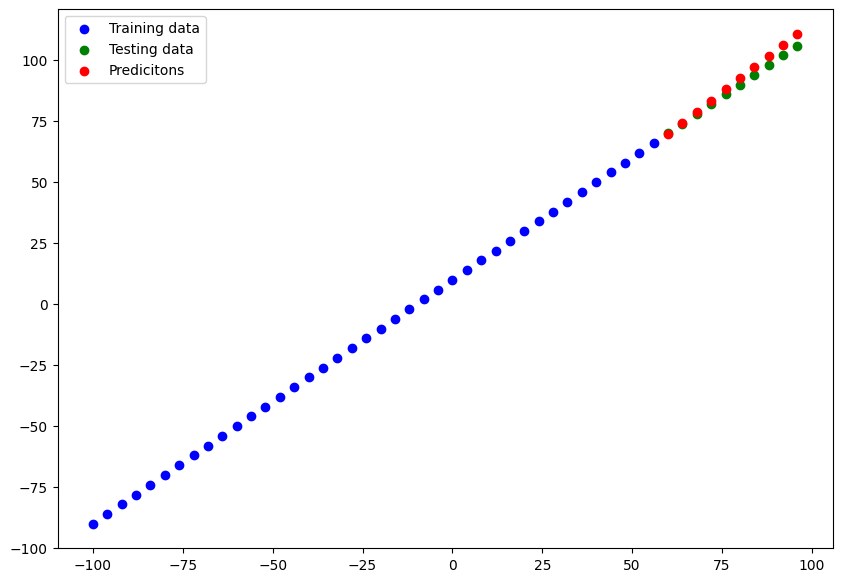

In [177]:
# Make and plot predicitons for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [184]:
# Calculate model_1 evalulation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3674705028533936>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.01070785522461>)